Which model is most accurate? Support Vector Machine (SVM), Decision Tree (C4.5), Naive Bayes (NB) and k Nearest Neighbors (k-NN), random forest, neural network 

# Logistic Regression

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cancer = pd.read_csv('breast_cancer.csv')



X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:,"mean radius":"worst fractal dimension"],cancer['target'], stratify=cancer['target'], random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
print('Accuracy of training set: {:.3f}'.format(log_reg_model.score(X_train, y_train)))

print('Accuracy of  testing set: {:.3f}'.format(log_reg_model.score(X_test, y_test)))

Accuracy of training set: 0.955
Accuracy of  test set: 0.958


### there are some underfitting !!

### bying change the paramter to boost the accuracy and correct the overfitting

In [27]:
log_reg_model 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
logReg100_model = LogisticRegression(C=100)
logReg100_model.fit(X_train, y_train)

print('Accuracy of training set: {:.3f}'.format(logReg100_model.score(X_train, y_train)))

print('Accuracy of  Testing set: {:.3f}'.format(logReg100_model.score(X_test, y_test)))

Accuracy of training set: 0.979
Accuracy of  Testing set: 0.965


## prediction

In [119]:
prediction = logReg100_model.predict(X_test)
prediction

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

## uncertainty Estimation

In [57]:
print('The decision function is(the confidence of each result predicted(pos - Benign, neg - Malignant): \n\n{}'.format(logReg100_model.decision_function(X_test)))
print("------------------------------------------------")
print('Thresholded decision function (whether result is predicted as Benign) :\n\n{}'.format(logReg100_model.decision_function(X_test)>0))


The decision function is(the confidence of each result predicted(pos - Benign, neg - Malignant): 

[ 5.03142967e+00 -9.58906807e+00  1.79329783e+00  2.89175849e+00
  8.12534884e-01 -2.37488337e+01 -5.71607142e+00 -1.44966993e+01
 -7.61105878e+00  7.60246291e+00  1.50201468e-01  9.21334412e+00
 -2.13281375e+01 -1.76419072e+01  4.31898229e+00  7.68040121e+00
 -2.57512446e+01 -3.85245537e+00  3.06976961e+00  6.91466875e+00
 -1.57806034e+01 -6.93133328e+00  4.77331249e+00  6.97948589e+00
  1.18130869e+01  5.44775321e+00  1.17717239e+01  9.46823195e+00
  5.20953334e+00 -1.75439040e+01  7.14804776e+00  3.79646012e+00
  3.76015476e+00  7.80807642e+00  9.19795887e+00  9.30978170e+00
  5.16128125e+00  6.29811834e+00 -3.61462044e+01  1.47070471e+01
 -4.03276645e+01  9.05474257e+00 -1.74839577e+01  2.79089410e+00
  3.54439990e+00  7.23628851e+00 -5.41887601e+00  8.23524980e+00
 -4.72993115e+00  4.08496005e+00  6.68743653e+00  7.74278385e+00
  7.59834776e+00 -1.62861060e+01  5.24226695e+00  2.8048

### Logistic Regression Visualization 

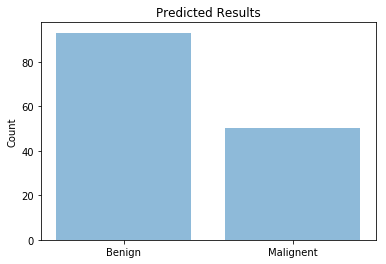

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
benign_count = len(prediction[prediction == 1])
malignant_count = len(prediction[prediction == 0])

objects = ('Benign','Malignent')
y_pos = np.arange(len(objects))
performance = [benign_count, malignant_count ]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Predicted Results')
 
plt.show()

In [106]:
predict = logReg100_model.decision_function(X_test)
predict

array([  5.27453732, -13.78068129, -14.83409545,   5.5240445 ,
        -8.46481117,   2.9688923 , -64.0940301 , -30.87555815,
       -11.46243362,   5.71627996, -15.31268936, -16.5380802 ,
         1.49575131,   2.07680549,   9.19795887,  10.21899623,
        11.98523869,  -5.01153688,  -0.50590539,  -9.18457909,
         1.67169115, -47.72306279,  -4.67336384,   9.52231528,
         7.18361393,  -7.51449321,   6.17931545,   5.2866365 ,
         6.52515027, -18.4437828 ,   4.67570832,   7.13101806,
         0.7499447 ,   9.21334412,   7.3692216 ,   8.77272559,
        -8.5457813 , -25.69645064, -17.64190721,   6.68571462,
       -20.44453898, -11.26983459, -12.80594766,  -8.05849097,
         4.25993998,  26.91802176,  10.63220044,   0.99436629,
        -0.28238097,  10.68966845,  -8.24482195,   8.06630001,
         8.30015232,   7.52026021,   4.92881111,   7.94906504,
         3.73960824,   5.18095174,   1.16996346,   9.64297776,
        -0.22402825,   3.24032601,   5.44775321, -30.93

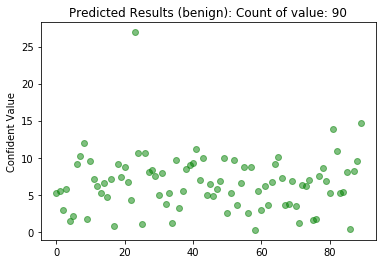

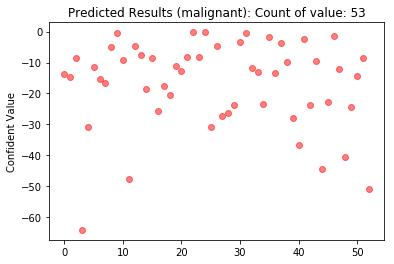

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
benign = list(predict[predict > 0])
malignant = list(predict[predict < 0])

malignantIndex = []
for i in malignant:
    malignantIndex.append(malignant.index(i))
    
benignIndex = []
for i in benign:
    benignIndex.append(benign.index(i))

plt.scatter(benignIndex, benign,  color = "green", alpha=0.5)

plt.ylabel('Confident Value')
plt.title(f'Predicted Results (benign): Count of value: {len(benignIndex)}')
 
plt.show()
plt.scatter(malignantIndex,malignant ,  color = "Red", alpha=0.5)
plt.ylabel('Confident Value')
plt.title(f'Predicted Results (malignant): Count of value: {len(malignantIndex)}')
 
plt.show()


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.48      0.45      0.47        53
        red       0.69      0.71      0.70        90

avg / total       0.61      0.62      0.61       143



# Support Vector Machine

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cancer = pd.read_csv('breast_cancer.csv')



X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:,"mean radius":"worst fractal dimension"],cancer['target'], stratify=cancer['target'], random_state=0)

svm_model = SVC()
svm_model.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the testing subset: 0.629


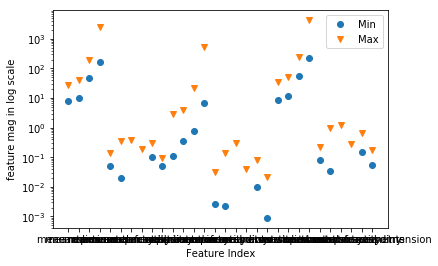

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label = "Min")
plt.plot(X_train.max(axis=0), 'v', label = "Max")
plt.xlabel("Feature Index")
plt.ylabel("feature mag in log scale")
plt.yscale("log")
plt.legend()

#### we have a overfitting Siuation due to scaling issue

Scale the data feature and modify the paramaters

In [70]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
dtype: float64
Maximum per feature
mean radius    

In [71]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))



The accuracy on the training subset: 0.955
The accuracy on the test subset: 0.951


now the underfitting is fixed now I want to change the parameter to see if I could boost up the accuracy

In [72]:
svm = SVC(C=800)
svm.fit(X_train_scaled, y_train) 

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.993
The accuracy on the test subset: 0.965


In [76]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train) 

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.993
The accuracy on the test subset: 0.972


### Prediction

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.48      0.45      0.47        53
        red       0.69      0.71      0.70        90

avg / total       0.61      0.62      0.61       143



In [117]:
prediction = svm.predict(X_test_scaled)
prediction

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

# Decison Tree

# Random Forest